# Feature Selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import os
os.chdir("/content/drive/My Drive/Patrones")

In [4]:
import seaborn as sns
import pandas as pd

In [5]:
df = pd.read_csv("HistoricalQuotes.csv")

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
import math
import seaborn as sns
import pandas as pd
warnings.filterwarnings('ignore')
from skimage import morphology
from skimage.measure import label, regionprops
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from tabulate import tabulate

ModuleNotFoundError: No module named 'cv2'

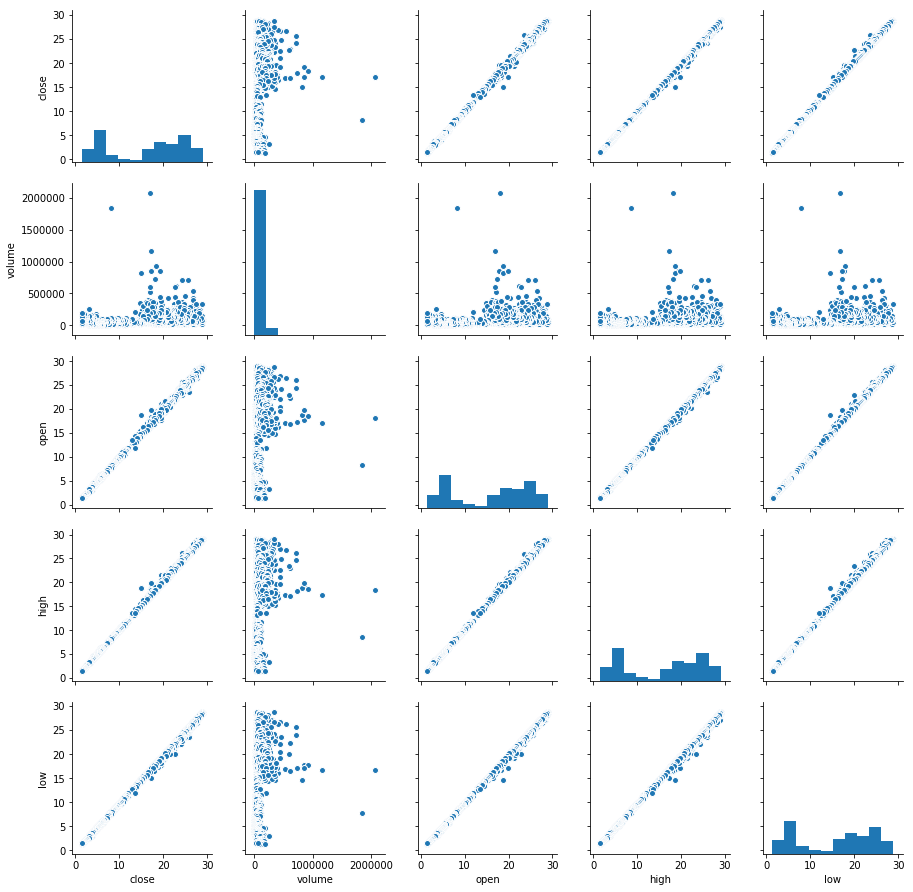

In [6]:
sns.pairplot(df)

In [0]:
df = pd.read_csv('HistoricalQuotes.csv')
df = df.append(pd.read_csv('HistoricalQuotes.csv'), ignore_index=True)
X = df.drop('date', axis=1)
y = df['date']

### **Statistical Test f classificator**

In [5]:
selector = SelectKBest(score_func=f_classif, k=3)

X_new = selector.fit_transform(X, y)

sel_features = np.squeeze(np.where(selector.get_support()==True)) #Where selection is True?

headers = ["feature " + str(i+1) for i in sel_features]
 
print(headers)
print(X.columns)

['feature 3', 'feature 4', 'feature 5']
Index(['close', 'volume', 'open', 'high', 'low'], dtype='object')


Con tres características observamos que se conervan el precio de apertura, el valor más alto y el más bajo alcanzados durante la jornada. Así, se desechan el valor de cierre y el volumen, el primero de estos necesario para saber cómo terminó el día, cosa a todas luces ilógica, pues ¿cómo podríamos imaginar siquiera el valor para el día siguiente sin conocer el final del anterior? Máxime cuando se trata de una serie de tiempo de la que se busca determinar una tendencia (que requiere un punto de inicio y un punto final).

### **Variance Threshold**

In [6]:
selector = VarianceThreshold(threshold=70)
X_new = selector.fit_transform(X)
print("Original features: ",X.iloc[0])
print("Selected features: ",X_new[0])

Original features:  close        19.95
volume    73578.00
open         20.14
high         20.18
low          19.90
Name: 0, dtype: float64
Selected features:  [1.9950e+01 7.3578e+04 2.0140e+01 2.0180e+01 1.9900e+01]


Aún con un threshold increíblemente alto (70), se mantienen las cinco características con las que cuenta el dataset.


In [7]:
selector = VarianceThreshold(threshold=80)
X_new = selector.fit_transform(X)
print("Original features: ",X.iloc[0])
print("Selected features: ",X_new[0])

Original features:  close        19.95
volume    73578.00
open         20.14
high         20.18
low          19.90
Name: 0, dtype: float64
Selected features:  [73578.]


Cuando se eleva aún más el threshold, solo queda una característica (volumen), que era eliminada por el método de Statistical Test f classificator.

### **Recursive Feature Elimination (Wrappers)**

In [8]:
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=3, step=1) #best 10 features
rfe.fit(X, y)
print(rfe.ranking_)
print(X.columns)

[1 3 2 1 1]
Index(['close', 'volume', 'open', 'high', 'low'], dtype='object')


Al usar eliminación recursiva de características, se observa que se mantienen el valor de cierre, el mayor y el menor alcanzados durante la jornada. Sin embargo, es insuficiente la información porque es imposible extraer de ellos una tendencia y, como se puede constatar en la literatura, omitir el volumen como factor para la realización de análisis técnico de la bolsa es un error común con graves consecuencias.

### **Statistical Test $\chi^2$**

In [0]:
k=3 #best 2 independets features

selector = SelectKBest(score_func=chi2, k=3)

X_new = selector.fit_transform(X, y)

sel_features = np.squeeze(np.where(selector.get_support()==True)) #Where selection is True?

headers = ["feature "+str(i+1) for i in sel_features]

In [10]:
print(headers)
print(X.columns)

['feature 2', 'feature 3', 'feature 4']
Index(['close', 'volume', 'open', 'high', 'low'], dtype='object')


Al usar chi cuadrado, vemos que se mantienen como caracterísitcas el volumen, valor de apertura y máximo. Consideramos que hemos ya enfatizado lo suficiente en la inconveniencia que representa eliminar el precio de cierre, y advertimos que sin el precio mínimo no quedaría considerado en el modelo la volatilidad del índice ni se podría verificar el compartamiento intradía del índice.

### **Conclusiones**
Con base en la información que hemos podido recuperar, conlcuimos que hacer un ejercicio de extracción de caracterísiticas que limite aún más la información que tenemos en el dataset solo podría llevar o al sobreentrenamiento o a la imposisbilidad de construir un modelo que sirva para predecir algo con una precisión por lo menos interesante.

Así, decidimos llevar a cabo el ejercicio de extracción con el único propósito de poner a prueba los conocimientos adquiridos. De modo que continuaremos empleando las cinco características con las que contamos, no sin hacer mención de que, en realidad, se suelen tener en cuenta más factores para la toma de decisiones en el mercado de valores y que un ejercicio del que se espere solidez debería considerar más caracterísiticas de las que tenemos nosotros.